In [27]:
# Instala as bibliotecas (execute apenas uma vez)
!pip install pandas numpy matplotlib seaborn plotly scikit-learn openpyxl


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.5 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/9.8 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.8 MB 1.3 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.8 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.8 MB 1.4 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.8 MB 1.4 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.8 MB 1.4 MB/s eta 0:00:06
   ---------- ----------------------------- 2.6/9.8 MB 1.4 MB/s eta 0:00:06
   ----------- ---------------------------- 2.9/9.8 MB 1.4 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.8 MB 1.4 MB/s eta 0:00:05
   ------------- -------------------------- 3.4/9.8 MB 1.4 MB/s eta 0:00:05
   -------------- --------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install matplotlib


  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.5 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.5 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:00:04
   --------------- --------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


✅ Todas as análises foram geradas e salvas em 'Analises_IBGE_Final.xlsx'.


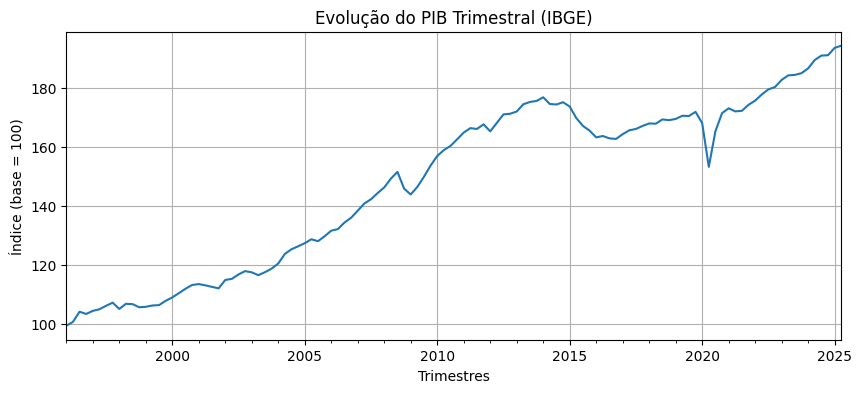

<Figure size 1000x400 with 0 Axes>

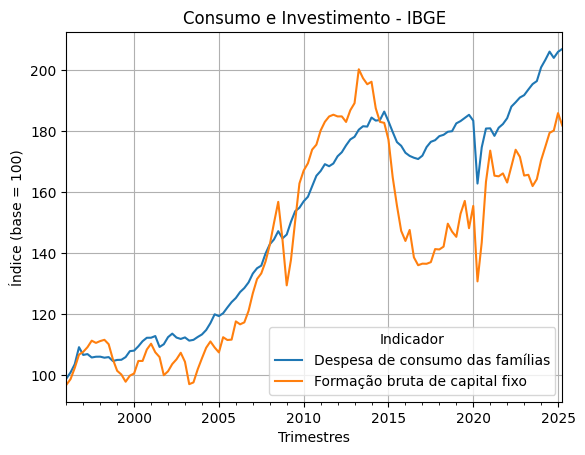

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# ====================================================
# 1️⃣ Leitura da tabela consolidada
# ====================================================
arquivo = "tabela_mae_IBGE_formatada.xlsx"

# Lê a base
tabela_mae = pd.read_excel(arquivo)

# ====================================================
# 2️⃣ Preparação dos dados
# ====================================================
# Transpõe para ter trimestres nas linhas e indicadores nas colunas
dados = tabela_mae.set_index("Indicador").T

# Converte valores numéricos (substitui vírgula por ponto)
dados = dados.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))

# Cria índice temporal (1996T1 em diante)
dados.index = pd.period_range(start="1996Q1", periods=len(dados), freq="Q")

# ====================================================
# 3️⃣ Análises automáticas
# ====================================================

# Crescimento trimestral (%)
variacao_trimestral = dados.pct_change() * 100

# Crescimento anual (%)
variacao_anual = dados.pct_change(4) * 100

# Crescimento acumulado desde 1996 (%)
crescimento_acum = (dados / dados.iloc[0]) * 100

# Média móvel (4 trimestres)
media_movel = dados.rolling(window=4).mean()

# Correlação entre indicadores
correlacao = dados.corr()

# Participação no PIB (%)
if "PIB a preços de mercado" in dados.columns:
    participacao_pib = (dados.div(dados["PIB a preços de mercado"], axis=0)) * 100
else:
    participacao_pib = pd.DataFrame()

# Estatísticas descritivas
estatisticas = dados.describe().T

# Defasagem de 1 trimestre
lags = dados.shift(1).add_suffix("_lag1")

# ====================================================
# 4️⃣ Exportação para Excel
# ====================================================
with pd.ExcelWriter("Analises_IBGE_Final.xlsx") as writer:
    dados.to_excel(writer, sheet_name="Dados_Limpos")
    variacao_trimestral.to_excel(writer, sheet_name="Cresc_Trim")
    variacao_anual.to_excel(writer, sheet_name="Cresc_Anual")
    crescimento_acum.to_excel(writer, sheet_name="Cresc_Acum")
    media_movel.to_excel(writer, sheet_name="Media_Movel")
    correlacao.to_excel(writer, sheet_name="Correlacao")
    participacao_pib.to_excel(writer, sheet_name="Participacao_PIB")
    estatisticas.to_excel(writer, sheet_name="Estatisticas")
    lags.to_excel(writer, sheet_name="Lags")

print("✅ Todas as análises foram geradas e salvas em 'Analises_IBGE_Final.xlsx'.")

# ====================================================
# 5️⃣ Gráficos de exemplo
# ====================================================
plt.figure(figsize=(10,4))
dados["PIB a preços de mercado"].plot(title="Evolução do PIB Trimestral (IBGE)")
plt.xlabel("Trimestres")
plt.ylabel("Índice (base = 100)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
dados[["Despesa de consumo das famílias", "Formação bruta de capital fixo"]].plot(title="Consumo e Investimento - IBGE")
plt.xlabel("Trimestres")
plt.ylabel("Índice (base = 100)")
plt.grid(True)
plt.show()


In [23]:
import pandas as pd

# Nome do arquivo Excel (na mesma pasta do JupyterLab)
arquivo = "Tabela 1621.xlsx"

# Lista das abas
abas = [f"Tabela {i}" for i in range(1, 119)]

# Lista para armazenar dataframes de cada aba
tabelas = []

for i, aba in enumerate(abas, start=1):
    try:
        # Leitura da aba (linhas 2 a 12)
        df = pd.read_excel(
            arquivo,
            sheet_name=aba,
            skiprows=1,  # começa da linha 2
            nrows=11     # lê até a linha 12
        )

        # Renomeia colunas para garantir padrão
        df.columns = ["Indicador", f"{1996 + (i-1)//4}T{(i-1)%4 + 1}"]

        # Mantém apenas as duas colunas principais
        df = df.iloc[:, :2]

        tabelas.append(df)

    except Exception as e:
        print(f"⚠️ Erro ao ler a aba {aba}: {e}")

# Junta tudo pelo indicador (merge sequencial)
tabela_mae = tabelas[0]
for t in tabelas[1:]:
    tabela_mae = pd.merge(tabela_mae, t, on="Indicador", how="outer")

# Exibe o resultado
display(tabela_mae.head())

# Salva o resultado
tabela_mae.to_excel("tabela_mae_IBGE_formatada.xlsx", index=False)
print("✅ Tabela formatada salva como 'tabela_mae_IBGE_formatada.xlsx'")


,Indicador,1996T1,1996T2,1996T3,1996T4,1997T1,1997T2,1997T3,1997T4,1998T1,...,2023T1,2023T2,2023T3,2023T4,2024T1,2024T2,2024T3,2024T4,2025T1,2025T2
0,Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Despesa de consumo da administração pública,99.17,100.77,104.27,88.50,100.34,99.93,98.37,98.99,101.44,...,153.50,157.69,158.75,159.39,159.63,159.70,160.64,161.34,161.35,160.42
2,Despesa de consumo das famílias,98.87,100.91,103.64,109.21,106.66,106.95,105.83,106.08,106.10,...,191.79,193.65,195.43,196.41,200.90,203.35,206.07,204.01,206.00,206.95
3,Exportação de bens e serviços,99.62,96.23,95.81,100.41,105.26,111.55,114.55,110.09,115.48,...,350.90,358.86,369.35,373.22,369.40,374.38,372.70,367.59,378.94,381.62
4,Fonte: IBGE - Contas Nacionais Trimestrais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


✅ Tabela formatada salva como 'tabela_mae_IBGE_formatada.xlsx'


In [28]:
# ============================================================
# 📚 Importações de bibliotecas
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configurações estéticas
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_theme()
pd.set_option("display.max_columns", None)


In [29]:
# ============================================================
# 📂 1. Leitura da base de dados consolidada
# ============================================================
arquivo = "tabela_mae_IBGE_formatada.xlsx"

df = pd.read_excel(arquivo)

print("✅ Dados carregados com sucesso!")
print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")
display(df.head())
# ============================================================
# 🔍 2. Análise descritiva básica
# ============================================================

print("📊 Estatísticas descritivas:")
display(df.describe())

print("\n🔎 Valores ausentes por coluna:")
print(df.isnull().sum())

print("\n📋 Tipos de dados:")
print(df.dtypes)


✅ Dados carregados com sucesso!
Linhas: 7 | Colunas: 119


,Indicador,1996T1,1996T2,1996T3,1996T4,1997T1,1997T2,1997T3,1997T4,1998T1,1998T2,1998T3,1998T4,1999T1,1999T2,1999T3,1999T4,2000T1,2000T2,2000T3,2000T4,2001T1,2001T2,2001T3,2001T4,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,2004T1,2004T2,2004T3,2004T4,2005T1,2005T2,2005T3,2005T4,2006T1,2006T2,2006T3,2006T4,2007T1,2007T2,2007T3,2007T4,2008T1,2008T2,2008T3,2008T4,2009T1,2009T2,2009T3,2009T4,2010T1,2010T2,2010T3,2010T4,2011T1,2011T2,2011T3,2011T4,2012T1,2012T2,2012T3,2012T4,2013T1,2013T2,2013T3,2013T4,2014T1,2014T2,2014T3,2014T4,2015T1,2015T2,2015T3,2015T4,2016T1,2016T2,2016T3,2016T4,2017T1,2017T2,2017T3,2017T4,2018T1,2018T2,2018T3,2018T4,2019T1,2019T2,2019T3,2019T4,2020T1,2020T2,2020T3,2020T4,2021T1,2021T2,2021T3,2021T4,2022T1,2022T2,2022T3,2022T4,2023T1,2023T2,2023T3,2023T4,2024T1,2024T2,2024T3,2024T4,2025T1,2025T2
0,Despesa de consumo da administração pública,99.17,100.77,104.27,88.50,100.34,99.93,98.37,98.99,101.44,102.12,103.89,103.04,101.98,103.09,105.23,107.11,105.37,104.38,102.97,104.04,106.43,106.63,106.67,107.89,110.88,110.92,111.15,110.99,110.08,111.17,113.36,116.31,114.15,118.30,118.23,117.73,118.38,119.00,120.25,120.21,121.85,121.89,123.32,127.84,126.97,130.03,129.33,128.67,130.76,130.59,134.40,129.82,134.92,133.32,134.79,137.97,139.09,139.94,141.31,141.82,142.94,144.33,143.76,143.44,146.31,147.16,146.42,147.73,146.47,148.79,149.84,151.42,149.63,150.59,151.22,149.96,149.27,148.10,148.37,147.06,149.23,148.81,148.23,147.85,147.02,147.29,147.13,148.65,148.58,148.97,149.57,147.57,148.21,148.14,147.81,147.62,148.27,136.30,141.15,144.24,145.46,147.45,149.66,151.15,151.23,150.22,153.49,151.50,153.50,157.69,158.75,159.39,159.63,159.70,160.64,161.34,161.35,160.42
1,Despesa de consumo das famílias,98.87,100.91,103.64,109.21,106.66,106.95,105.83,106.08,106.10,105.76,105.96,104.67,105.03,105.08,105.96,107.91,108.08,109.49,111.17,112.29,112.31,112.86,109.28,110.17,112.49,113.65,112.36,111.91,112.41,111.35,111.61,112.55,113.38,114.83,117.10,119.98,119.40,120.33,122.21,123.98,125.33,127.27,128.59,130.44,133.33,135.08,135.93,139.88,142.90,144.53,147.23,144.86,146.12,150.31,153.79,154.90,157.01,158.50,161.96,165.38,166.94,169.18,168.51,169.40,171.77,173.10,175.35,177.29,178.16,180.48,181.61,181.50,184.46,183.46,183.66,186.42,183.23,179.73,176.42,175.20,172.92,171.89,171.29,170.87,171.97,174.80,176.51,177.04,178.37,178.80,179.80,179.99,182.55,183.30,184.33,185.36,183.44,162.83,174.69,180.86,180.93,178.46,181.13,182.33,184.25,188.05,189.47,191.02,191.79,193.65,195.43,196.41,200.90,203.35,206.07,204.01,206.00,206.95
2,Exportação de bens e serviços,99.62,96.23,95.81,100.41,105.26,111.55,114.55,110.09,115.48,118.48,113.97,114.74,116.11,118.94,117.35,136.36,132.78,134.88,144.85,141.93,150.20,155.01,149.40,147.95,150.15,138.47,176.68,176.69,171.66,176.95,179.55,185.52,194.58,200.81,204.85,211.20,219.43,223.57,227.12,230.26,234.09,219.20,248.18,241.85,249.64,245.45,249.60,252.65,247.18,257.86,252.97,238.25,222.43,230.94,227.16,229.33,251.34,248.68,256.38,259.00,261.56,265.00,270.39,271.48,269.89,260.74,265.30,275.04,265.98,272.49,268.67,287.26,270.84,266.55,279.88,261.73,277.41,288.61,286.99,298.56,297.54,297.23,283.79,279.69,300.43,306.16,310.87,301.08,314.88,300.58,318.79,328.82,314.80,302.08,303.18,311.56,302.81,300.64,298.53,296.74,308.46,337.05,306.32,305.67,333.11,321.12,331.98,347.47,350.90,358.86,369.35,373.22,369.40,374.38,372.70,367.59,378.94,381.62
3,Formação bruta de capital fixo,96.84,98.72,102.41,106.77,107.68,109.20,111.34,110.61,111.21,111.62,110.18,105.21,101.47,100.24,97.89,99.87,100.59,104.69,104.70,108.44,110.35,107.53,105.97,100.02,101.30,103.68,105.23,107.38,104.41,97.09,97.66,101.94,105.56,109.02,111.08,109.11,107.49,112.47,111.56,111.69,117.66,116.70,117.34,121.11,126.85,131.53,133.39,137.27,142.72,149.94,156.83,144.47,129.47,137.84,150.64,162.87,167.08,169.47,173.95,175.58,180.22,183.06,184.81,185.39,184.83,184.84,183.02,186.85,189.18,200.28,197.35,195.38,196.19,187.50,183.04,182.72,177.22,164.88,155.59,14

In [30]:
# ============================================================
# 🔍 2. Análise descritiva básica
# ============================================================

print("📊 Estatísticas descritivas:")
display(df.describe())

print("\n🔎 Valores ausentes por coluna:")
print(df.isnull().sum())

print("\n📋 Tipos de dados:")
print(df.dtypes)


📊 Estatísticas descritivas:


,1996T1,1996T2,1996T3,1996T4,1997T1,1997T2,1997T3,1997T4,1998T1,1998T2,1998T3,1998T4,1999T1,1999T2,1999T3,1999T4,2000T1,2000T2,2000T3,2000T4,2001T1,2001T2,2001T3,2001T4,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,2004T1,2004T2,2004T3,2004T4,2005T1,2005T2,2005T3,2005T4,2006T1,2006T2,2006T3,2006T4,2007T1,2007T2,2007T3,2007T4,2008T1,2008T2,2008T3,2008T4,2009T1,2009T2,2009T3,2009T4,2010T1,2010T2,2010T3,2010T4,2011T1,2011T2,2011T3,2011T4,2012T1,2012T2,2012T3,2012T4,2013T1,2013T2,2013T3,2013T4,2014T1,2014T2,2014T3,2014T4,2015T1,2015T2,2015T3,2015T4,2016T1,2016T2,2016T3,2016T4,2017T1,2017T2,2017T3,2017T4,2018T1,2018T2,2018T3,2018T4,2019T1,2019T2,2019T3,2019T4,2020T1,2020T2,2020T3,2020T4,2021T1,2021T2,2021T3,2021T4,2022T1,2022T2,2022T3,2022T4,2023T1,2023T2,2023T3,2023T4,2024T1,2024T2,2024T3,2024T4,2025T1,2025T2
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,97.892857,99.700000,103.135714,104.164286,106.711429,108.627143,109.432857,108.044286,110.200000,110.267143,109.848571,107.644286,105.770000,106.084286,105.454286,110.384286,109.924286,111.957143,115.185714,116.581429,119.132857,118.782857,115.674286,113.891429,115.782857,114.338571,120.191429,120.164286,119.038571,118.405714,119.484286,123.294286,125.174286,128.867143,130.495714,132.352857,134.057143,136.311429,136.660000,138.434286,142.254286,140.920000,147.394286,149.162857,153.350000,155.050000,157.968571,160.848571,163.045714,168.708571,171.378571,163.114286,155.080000,159.868571,164.052857,170.904286,179.614286,181.260000,186.610000,188.540000,190.860000,194.288571,195.482857,197.318571,195.450000,196.200000,196.054286,200.697143,201.345714,205.732857,204.562857,207.130000,205.414286,202.152857,204.605714,199.922857,200.085714,195.801429,189.928571,187.911429,184.898571,188.464286,182.730000,182.735714,187.214286,188.798571,190.691429,191.781429,194.237143,192.305714,199.831429,198.247143,195.334286,197.112857,199.532857,197.707143,196.110000,179.057143,183.901429,195.575714,203.951429,204.908571,198.845714,200.721429,204.191429,206.121429,211.555714,212.557143,210.575714,214.985714,216.587143,218.240000,221.034286,226.904286,228.812857,228.115714,233.981429,232.668571
std,2.966983,1.711491,3.546199,9.282517,5.775317,7.578541,8.322187,5.461916,8.956091,6.954305,6.244484,4.993439,4.907012,6.084389,6.353983,11.802144,10.490491,10.428320,14.126166,12.620947,15.329635,16.904455,15.160480,15.594770,15.983890,11.829296,25.519108,25.881167,24.123427,26.996476,27.784596,28.108333,31.162701,32.241439,33.307106,35.297344,38.252526,38.902318,40.285351,40.948762,40.911586,35.204214,45.360658,41.903899,43.915446,41.287554,42.926400,43.558715,40.981457,45.047467,42.609914,38.759216,31.781668,34.019161,31.463236,33.307177,43.208704,42.856535,47.874408,47.872035,48.091514,50.697963,52.817286,54.585263,51.441577,50.117921,47.873000,53.465526,53.960117,54.883151,52.392177,56.051142,52.162880,50.635103,55.685388,47.213160,51.176783,53.004229,50.531864,54.360355,53.628319,55.15


🔎 Valores ausentes por coluna:
Indicador    0
1996T1       0
1996T2       0
1996T3       0
1996T4       0
            ..
2024T2       0
2024T3       0
2024T4       0
2025T1       0
2025T2       0
Length: 119, dtype: int64

📋 Tipos de dados:
Indicador     object
1996T1       float64
1996T2       float64
1996T3       float64
1996T4       float64
              ...   
2024T2       float64
2024T3       float64
2024T4       float64
2025T1       float64
2025T2       float64
Length: 119, dtype: object


In [134]:
# Definição do segundo html
import pandas as pd
import os
import webbrowser
from bs4 import BeautifulSoup

# ==============================
# 1️⃣ Leitura dos dados
# ==============================
arquivo_excel = "Analises_IBGE_Final.xlsx"
df = pd.read_excel(arquivo_excel)
df.set_index(df.columns[0], inplace=True)
df.index.name = "Variáveis observadas"

# ==============================
# 2️⃣ Cálculo das estatísticas
# ==============================
stats = pd.DataFrame({
    "Média": df.mean(numeric_only=True),
    "Mediana": df.median(numeric_only=True),
    "Desvio Padrão": df.std(numeric_only=True),
    "Variância": df.var(numeric_only=True),
    "Coeficiente de Variação (%)": (df.std(numeric_only=True) / df.mean(numeric_only=True)) * 100
}).round(2)
stats.index.name = "Variáveis observadas"

# ==============================
# 3️⃣ Matriz de correlação
# ==============================
corr = df.corr(numeric_only=True).round(2)
corr.index.name = "Variáveis observadas"

# ==============================
# 4️⃣ Funções para gerar HTML
# ==============================
def tabela_html_stats(df):
    df_reset = df.reset_index()
    return df_reset.to_html(
        classes='table table-hover table-bordered stats-table',
        border=0,
        index=False,
        justify='center'
    )

def tabela_html_corr(df):
    html = df.to_html(classes='table table-hover table-bordered corr-table', border=0, index=True, justify='center')
    # remover segunda linha do <thead>
    soup = BeautifulSoup(html, 'html.parser')
    thead = soup.find('thead')
    if thead and len(thead.find_all('tr')) > 1:
        thead.find_all('tr')[1].decompose()  # remove segunda linha
    return str(soup)

stats_html = tabela_html_stats(stats)
corr_html = tabela_html_corr(corr)

# ==============================
# 5️⃣ HTML moderno e sofisticado
# ==============================
html_template = f"""
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <title>Análises Estatísticas IBGE</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.2/dist/css/bootstrap.min.css">
    <style>
        body {{
            margin: 40px;
            font-family: 'Times New Roman', Times, serif;
            background-color: #ffffff;
            color: #333333;
        }}
        h1 {{
            text-align: left;  
            font-weight: 700; /* apenas títulos em negrito */
            margin-bottom: 50px;
            font-size: 2rem;
            color: #111111;
        }}
        h2 {{
            margin-top: 40px;
            margin-bottom: 20px;
            font-weight: 600; /* apenas títulos em negrito */
            font-size: 1.5rem;
            color: #111111;
        }}
        .table {{
            font-size: 1rem;
            background-color: #ffffff;
            border-collapse: collapse;
        }}
        .table thead th {{
            background-color: #000000;  
            color: #ffffff;             
            font-weight: bold;  /* cabeçalho em negrito */
            font-style: italic;
            text-align: center;
        }}
        .table tbody td {{
            text-align: center;
            padding: 8px;
            font-weight: normal; /* dados em peso normal */
        }}
        /* Primeira coluna da tabela (dados) */
        .table tbody td:first-child {{
            text-align: left;  /* alinhamento à esquerda */
            font-weight: normal; /* sem negrito */
        }}
        .table tbody tr:nth-child(even) {{
            background-color: #f9f9f9;  
        }}
        .table-container {{
            margin-bottom: 50px;
            overflow-x: auto;
        }}
    </style>
</head>
<body>
    <h1>Análises Estatísticas Principais</h1>
    <div class="table-container">
        {stats_html}
    </div>
    <h2>Matriz de Correlação</h2>
    <div class="table-container">
        {corr_html}
    </div>
</body>
</html>
"""

# ==============================
# 6️⃣ Salvar HTML e abrir no navegador
# ==============================
nome_arquivo_html = "Analises_IBGE_Moderno.html"
caminho_html = os.path.abspath(nome_arquivo_html)

with open(caminho_html, "w", encoding="utf-8") as f:
    f.write(html_template)

webbrowser.open('file://' + caminho_html)

print(f"✅ HTML moderno e sofisticado gerado: {caminho_html}")


✅ HTML moderno e sofisticado gerado: C:\Users\Thayene\PyCharmMiscProject\Analises_IBGE_Moderno.html


In [37]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import webbrowser
import os

# ==============================
# 1️⃣ Leitura e preparação dos dados
# ==============================
arquivo = "tabela_mae_IBGE_formatada.xlsx"
tabela_mae = pd.read_excel(arquivo)

dados = tabela_mae.set_index("Indicador").T
dados = dados.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))
dados.index = pd.period_range(start="1996Q1", periods=len(dados), freq="Q")

# ==============================
# 2️⃣ Cálculos adicionais
# ==============================
variacao_trimestral = dados.pct_change() * 100
variacao_anual = dados.pct_change(4) * 100
crescimento_acum = (dados / dados.iloc[0]) * 100
media_movel = dados.rolling(window=4).mean()
desvio_relativo = ((dados - dados.mean()) / dados.mean()) * 100

# ==============================
# 3️⃣ Função para criar gráficos
# ==============================
def criar_graficos(indicador):
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=(
            f"Evolução do {indicador}",
            f"Média móvel (4 trimestres) - {indicador}",
            f"Variação trimestral (%) - {indicador}",
            f"Variação anual (%) - {indicador}",
            f"Crescimento acumulado (%) - {indicador}",
            f"Desvio relativo (%) - {indicador}"
        )
    )

    fig.add_trace(go.Scatter(x=dados.index.to_timestamp(), y=dados[indicador],
                             mode='lines+markers', name='Valor',
                             line=dict(color='black')), row=1, col=1)

    fig.add_trace(go.Scatter(x=media_movel.index.to_timestamp(), y=media_movel[indicador],
                             mode='lines+markers', name='Média Móvel',
                             line=dict(color='darkslategray')), row=1, col=2)

    fig.add_trace(go.Bar(x=variacao_trimestral.index.to_timestamp(), y=variacao_trimestral[indicador],
                         name='Variação Trimestral', marker_color='black'), row=2, col=1)

    fig.add_trace(go.Bar(x=variacao_anual.index.to_timestamp(), y=variacao_anual[indicador],
                         name='Variação Anual', marker_color='darkslategray'), row=2, col=2)

    fig.add_trace(go.Scatter(x=crescimento_acum.index.to_timestamp(), y=crescimento_acum[indicador],
                             mode='lines', name='Crescimento Acumulado',
                             line=dict(color='black', dash='dash')), row=3, col=1)

    fig.add_trace(go.Scatter(x=desvio_relativo.index.to_timestamp(), y=desvio_relativo[indicador],
                             mode='lines+markers', name='Desvio Relativo',
                             line=dict(color='darkslategray', dash='dot')), row=3, col=2)

    fig.update_layout(
        height=900, width=1200,
        template='simple_white',
        title=dict(
            text=f"Análise Completa: {indicador}",
            font=dict(family="Times New Roman", size=22, color='black', weight='bold')
        ),
        font=dict(family="Times New Roman", size=12, color='black'),
        showlegend=True
    )

    return fig

# ==============================
# 4️⃣ Gerar HTML e abrir navegador
# ==============================
nome_arquivo = "Dashboard_IBGE.html"
with open(nome_arquivo, "w", encoding="utf-8") as f:
    f.write("<html><head><title>Dashboard IBGE</title></head><body style='background-color:white; font-family:Times New Roman;'>\n")
    for indicador in dados.columns:
        fig = criar_graficos(indicador)
        f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("</body></html>")

# Abre o HTML automaticamente no navegador padrão
webbrowser.open('file://' + os.path.realpath(nome_arquivo))

print(f"✅ Dashboard gerado e aberto: {nome_arquivo}")


✅ Dashboard gerado e aberto: Dashboard_IBGE.html


In [41]:
pip install dash plotly

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.9 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/7.9 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/7.9 MB 1.5 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/7.9 MB 1.5 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/7.9 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/7.9 MB 1.5 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/7.9 MB 1.5 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/7.9 MB 1.5 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/7.9 MB 1.5 MB/s eta 0:00:04
   ----------------- ---------------------- 3.4/7.9 MB 1.5 MB/s eta 0:00:04
   ------------------ --------------------- 3.7/7.9 MB 1.5 MB/s eta 0:00:03
   ------------------- ---


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import pandas as pd
import plotly.graph_objects as go
import webbrowser
import os

# ==============================
# 1️⃣ Leitura e preparação dos dados
# ==============================
arquivo = "tabela_mae_IBGE_formatada.xlsx"
tabela_mae = pd.read_excel(arquivo)

dados = tabela_mae.set_index("Indicador").T
dados = dados.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))
dados.index = pd.period_range(start="1996Q1", periods=len(dados), freq="Q")

# ==============================
# 2️⃣ Cálculos adicionais
# ==============================
variacao_trimestral = dados.pct_change() * 100
variacao_anual = dados.pct_change(4) * 100
crescimento_acum = (dados / dados.iloc[0]) * 100
media_movel = dados.rolling(window=4).mean()
desvio_relativo = ((dados - dados.mean()) / dados.mean()) * 100

# ==============================
# 3️⃣ Criar gráfico interativo com menus
# ==============================
indicadores = list(dados.columns)
analises = {
    "Evolução": dados,
    "Média Móvel": media_movel,
    "Variação Trimestral (%)": variacao_trimestral,
    "Variação Anual (%)": variacao_anual,
    "Crescimento Acumulado (%)": crescimento_acum,
    "Desvio Relativo (%)": desvio_relativo
}

# Inicializa com primeiro indicador e análise
indicador_inicial = indicadores[0]
analise_inicial = "Evolução"
serie_inicial = analises[analise_inicial][indicador_inicial]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=dados.index.to_timestamp(),
    y=serie_inicial,
    mode='lines+markers',
    line=dict(color='black'),
    name=f"{analise_inicial} - {indicador_inicial}"
))

# Layout com menus reposicionados e margem superior maior
fig.update_layout(
    title=f"{analise_inicial} - {indicador_inicial}",
    template='simple_white',
    height=700,
    width=1200,
    font=dict(family="Times New Roman", size=14),
    margin=dict(t=180),  # aumenta espaço superior para menus e título
    updatemenus=[
        # Menu para selecionar análise
        dict(
            buttons=[
                dict(label=analise, method="update",
                     args=[{"y": [analises[analise][indicador_inicial]],
                            "x": [dados.index.to_timestamp()],
                            "name": f"{analise} - {indicador_inicial}"},
                           {"title": f"{analise} - {indicador_inicial}"}])
                for analise in analises.keys()
            ],
            direction="down",
            showactive=True,
            x=0.0, y=1.3,  # move acima do gráfico, fora do título
            xanchor="left", yanchor="top"
        ),
        # Menu para selecionar indicador
        dict(
            buttons=[
                dict(label=ind, method="update",
                     args=[{"y": [analises[analise_inicial][ind]],
                            "x": [dados.index.to_timestamp()],
                            "name": f"{analise_inicial} - {ind}"},
                           {"title": f"{analise_inicial} - {ind}"}])
                for ind in indicadores
            ],
            direction="down",
            showactive=True,
            x=0.25, y=1.3,  # mesma altura do outro menu
            xanchor="left", yanchor="top"
        )
    ]
)

# ==============================
# 4️⃣ Exportar para HTML
# ==============================
nome_arquivo = "Dashboard_IBGE_Interativo.html"
fig.write_html(nome_arquivo, full_html=True, include_plotlyjs='cdn')

# Abrir no navegador
webbrowser.open('file://' + os.path.realpath(nome_arquivo))

print(f"✅ Dashboard interativo gerado: {nome_arquivo}")

✅ Dashboard interativo gerado: Dashboard_IBGE_Interativo.html


In [47]:
import pandas as pd
import plotly.graph_objects as go
import webbrowser
import os

# ==============================
# 1️⃣ Leitura e preparação dos dados
# ==============================
arquivo = "tabela_mae_IBGE_formatada.xlsx"
tabela_mae = pd.read_excel(arquivo)

dados = tabela_mae.set_index("Indicador").T
dados = dados.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))
dados.index = pd.period_range(start="1996Q1", periods=len(dados), freq="Q")

# ==============================
# 2️⃣ Cálculos adicionais
# ==============================
variacao_trimestral = dados.pct_change() * 100
variacao_anual = dados.pct_change(4) * 100
crescimento_acum = (dados / dados.iloc[0]) * 100
media_movel = dados.rolling(window=4).mean()
desvio_relativo = ((dados - dados.mean()) / dados.mean()) * 100
# ==============================
# 3️⃣ Criar gráfico interativo com menus
# ==============================
indicadores = list(dados.columns)
analises = {
    "Evolução": dados,
    "Média Móvel": media_movel,
    "Variação Trimestral (%)": variacao_trimestral,
    "Variação Anual (%)": variacao_anual,
    "Crescimento Acumulado (%)": crescimento_acum,
    "Desvio Relativo (%)": desvio_relativo
}

# Inicializa com primeiro indicador e análise
indicador_inicial = indicadores[0]
analise_inicial = "Evolução"
serie_inicial = analises[analise_inicial][indicador_inicial]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=dados.index.to_timestamp(),
    y=serie_inicial,
    mode='lines+markers',
    line=dict(color='black'),
    name=f"{analise_inicial} - {indicador_inicial}"
))

# Layout inicial
fig.update_layout(
    title=f"{analise_inicial} - {indicador_inicial}",
    template='simple_white',
    height=700,
    width=1200,
    font=dict(family="Times New Roman", size=14),
    updatemenus=[
        # Menu para selecionar análise
        dict(
            buttons=[
                dict(label=analise, method="update",
                     args=[{"y": [analises[analise][indicador_inicial]],
                            "x": [dados.index.to_timestamp()],
                            "name": f"{analise} - {indicador_inicial}"},
                           {"title": f"{analise} - {indicador_inicial}"}])
                for analise in analises.keys()
            ],
            direction="down",
            showactive=True,
            x=0.0, y=1.15,
            xanchor="left", yanchor="top"
        ),
        # Menu para selecionar indicador
        dict(
            buttons=[
                dict(label=ind, method="update",
                     args=[{"y": [analises[analise_inicial][ind]],
                            "x": [dados.index.to_timestamp()],
                            "name": f"{analise_inicial} - {ind}"},
                           {"title": f"{analise_inicial} - {ind}"}])
                for ind in indicadores
            ],
            direction="down",
            showactive=True,
            x=0.25, y=1.15,
            xanchor="left", yanchor="top"
        )
    ]
)

# ==============================
# 4️⃣ Exportar para HTML
# ==============================
nome_arquivo = "Dashboard_IBGE_Interativo.html"
fig.write_html(nome_arquivo, full_html=True, include_plotlyjs='cdn')

# Abrir no navegador
webbrowser.open('file://' + os.path.realpath(nome_arquivo))

print(f"✅ Dashboard interativo gerado: {nome_arquivo}")

✅ Dashboard interativo gerado: Dashboard_IBGE_Interativo.html


In [50]:
import pandas as pd
import plotly.graph_objects as go
import webbrowser
import os

# ==============================
# 1️⃣ Leitura e preparação dos dados
# ==============================
arquivo = "tabela_mae_IBGE_formatada.xlsx"
tabela_mae = pd.read_excel(arquivo)

dados = tabela_mae.set_index("Indicador").T
dados = dados.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))
dados.index = pd.period_range(start="1996Q1", periods=len(dados), freq="Q")

# ==============================
# 2️⃣ Cálculos adicionais
# ==============================
variacao_trimestral = dados.pct_change() * 100
variacao_anual = dados.pct_change(4) * 100
crescimento_acum = (dados / dados.iloc[0]) * 100
media_movel = dados.rolling(window=4).mean()
desvio_relativo = ((dados - dados.mean()) / dados.mean()) * 100

# ==============================
# 3️⃣ Criar gráfico interativo com menus e filtro de período
# ==============================
indicadores = list(dados.columns)
analises = {
    "Evolução": dados,
    "Média Móvel": media_movel,
    "Variação Trimestral (%)": variacao_trimestral,
    "Variação Anual (%)": variacao_anual,
    "Crescimento Acumulado (%)": crescimento_acum,
    "Desvio Relativo (%)": desvio_relativo
}

indicador_inicial = indicadores[0]
analise_inicial = "Evolução"
serie_inicial = analises[analise_inicial][indicador_inicial]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=dados.index.to_timestamp(),
    y=serie_inicial,
    mode='lines+markers',
    line=dict(color='black'),
    name=f"{analise_inicial} - {indicador_inicial}"
))

# Layout com título formal, espaçamento extra e fonte Times New Roman
fig.update_layout(
    title=dict(
        text="Painel Interativo para Análise Dinâmica de Indicadores Econômicos Brasileiros – IBGE (1996–2025)",
        y=0.88,  # título bem abaixo do topo
        font=dict(size=26, family="Times New Roman", color="black")
    ),
    template='simple_white',
    height=850,
    width=1200,
    font=dict(family="Times New Roman", size=14),
    margin=dict(t=320),  # grande espaço superior para menus e título
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=[
                dict(count=5, label="Últimos 5 anos", step="year", stepmode="backward"),
                dict(count=10, label="Últimos 10 anos", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ],
            font=dict(family="Times New Roman")
        )
    ),
    updatemenus=[
        dict(
            buttons=[
                dict(label=analise, method="update",
                     args=[{"y": [analises[analise][indicador_inicial]],
                            "x": [dados.index.to_timestamp()],
                            "name": f"{analise} - {indicador_inicial}"},
                           {"title": f"{analise} - {indicador_inicial}"}])
                for analise in analises.keys()
            ],
            direction="down",
            showactive=True,
            x=0.0, y=1.22,  # menus bem abaixo do título
            xanchor="left", yanchor="top",
            font=dict(family="Times New Roman")
        ),
        dict(
            buttons=[
                dict(label=ind, method="update",
                     args=[{"y": [analises[analise_inicial][ind]],
                            "x": [dados.index.to_timestamp()],
                            "name": f"{analise_inicial} - {ind}"},
                           {"title": f"{analise_inicial} - {ind}"}])
                for ind in indicadores
            ],
            direction="down",
            showactive=True,
            x=0.35, y=1.22,
            xanchor="left", yanchor="top",
            font=dict(family="Times New Roman")
        )
    ]
)

# ==============================
# 4️⃣ Exportar para HTML
# ==============================
nome_arquivo = "Dashboard_IBGE_Interativo.html"
fig.write_html(nome_arquivo, full_html=True, include_plotlyjs='cdn')

webbrowser.open('file://' + os.path.realpath(nome_arquivo))

print(f"✅ Dashboard interativo gerado com espaçamento ajustado e fonte Times New Roman: {nome_arquivo}")

✅ Dashboard interativo gerado com espaçamento ajustado e fonte Times New Roman: Dashboard_IBGE_Interativo.html


In [55]:
import pandas as pd
import plotly.graph_objects as go
import webbrowser
import os

# ==============================
# 1️⃣ Leitura e preparação dos dados
# ==============================
arquivo = "tabela_mae_IBGE_formatada.xlsx"  # Ajuste para seu caminho
tabela_mae = pd.read_excel(arquivo)

dados = tabela_mae.set_index("Indicador").T
dados = dados.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))
dados.index = pd.period_range(start="1996Q1", periods=len(dados), freq="Q")

# ==============================
# 2️⃣ Cálculos adicionais
# ==============================
variacao_trimestral = dados.pct_change() * 100
variacao_anual = dados.pct_change(4) * 100
crescimento_acum = (dados / dados.iloc[0]) * 100
media_movel = dados.rolling(window=4).mean()
desvio_relativo = ((dados - dados.mean()) / dados.mean()) * 100

analises = {
    "Evolução": dados,
    "Média Móvel": media_movel,
    "Variação Trimestral (%)": variacao_trimestral,
    "Variação Anual (%)": variacao_anual,
    "Crescimento Acumulado (%)": crescimento_acum,
    "Desvio Relativo (%)": desvio_relativo
}

indicadores = list(dados.columns)

# ==============================
# 3️⃣ Função para calcular estatísticas
# ==============================
def calcular_estatisticas(serie):
    return {
        "Média": round(serie.mean(), 2),
        "Mediana": round(serie.median(), 2),
        "Desvio Padrão": round(serie.std(), 2),
        "Coeficiente de Variação (%)": round((serie.std() / serie.mean()) * 100, 2) if serie.mean() != 0 else None,
        "Mínimo": round(serie.min(), 2),
        "Máximo": round(serie.max(), 2),
        "Crescimento (%)": round(((serie.iloc[-1] / serie.iloc[0]) - 1) * 100, 2) if serie.iloc[0] != 0 else None
    }

# Estatísticas iniciais
indicador1 = indicadores[0]
indicador2 = indicadores[1]
analise_inicial = "Evolução"
serie1 = analises[analise_inicial][indicador1]
serie2 = analises[analise_inicial][indicador2]

estat1 = calcular_estatisticas(serie1)
estat2 = calcular_estatisticas(serie2)
correlacao = round(dados[indicador1].corr(dados[indicador2]), 2)

# ==============================
# 4️⃣ Criar gráfico interativo
# ==============================
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados.index.to_timestamp(), y=serie1, mode='lines+markers', name=indicador1, line=dict(color='black')))
fig.add_trace(go.Scatter(x=dados.index.to_timestamp(), y=serie2, mode='lines+markers', name=indicador2, line=dict(color='darkslategray')))

fig.update_layout(
    title=dict(
        text=(
            "<span style='font-family:Times New Roman; font-size:24px;'>"
            "Painel Interativo para Análise Dinâmica de Indicadores Econômicos Brasileiros – IBGE (1996–2025)</span>"
            "<br><span style='font-size:16px; font-family:Times New Roman; color:#333;'>"
            "Explore os indicadores, selecione métodos de análise e ajuste o intervalo de tempo pelo controle deslizante."
            "</span>"
        ),
        y=0.88
    ),
    template='simple_white',
    height=1000,
    width=1200,
    font=dict(family="Times New Roman", size=14),
    margin=dict(t=400),
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=[
                dict(count=5, label="Últimos 5 anos", step="year", stepmode="backward"),
                dict(count=10, label="Últimos 10 anos", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ],
            font=dict(family="Times New Roman")
        )
    )
)

# ==============================
# 5️⃣ Tabela sofisticada
# ==============================
def gerar_tabela(estat1, estat2, indicador1, indicador2, correlacao):
    tabela_html = f"""
    <table style='border-collapse:collapse; width:90%; margin-top:30px; font-family:Times New Roman; font-size:16px;'>
        <thead>
            <tr style='background-color:#2c3e50; color:white;'>
                <th style='border:1px solid #444; padding:10px;'>Métrica</th>
                <th style='border:1px solid #444; padding:10px;'>{indicador1}</th>
                <th style='border:1px solid #444; padding:10px;'>{indicador2}</th>
            </tr>
        </thead>
        <tbody>
    """
    for k in estat1.keys():
        tabela_html += f"""
            <tr style='background-color:#ecf0f1;'>
                <td style='border:1px solid #ccc; padding:10px;'>{k}</td>
                <td style='border:1px solid #ccc; padding:10px;'>{estat1[k]}</td>
                <td style='border:1px solid #ccc; padding:10px;'>{estat2[k]}</td>
            </tr>
        """
    tabela_html += f"""
        <tr style='background-color:#34495e; color:white;'>
            <td style='border:1px solid #ccc; padding:10px;'><b>Correlação</b></td>
            <td colspan='2' style='border:1px solid #ccc; padding:10px; text-align:center;'><b>{correlacao}</b></td>
        </tr>
        </tbody>
    </table>
    """
    return tabela_html

tabela_html = gerar_tabela(estat1, estat2, indicador1, indicador2, correlacao)

# ==============================
# 6️⃣ Exportar para HTML com menus suspensos
# ==============================
nome_arquivo = "Dashboard_IBGE_Comparativo.html"
with open(nome_arquivo, "w", encoding="utf-8") as f:
    f.write("<html><head><title>Dashboard IBGE</title></head><body style='font-family:Times New Roman;'>")
    f.write("<div style='margin-bottom:20px;'>")
    f.write("<label for='indicador1'>Indicador 1:</label>")
    f.write("<select id='indicador1'>" + "".join([f"<option value='{i}'>{i}</option>" for i in indicadores]) + "</select>")
    f.write("<label for='indicador2' style='margin-left:20px;'>Indicador 2:</label>")
    f.write("<select id='indicador2'>" + "".join([f"<option value='{i}'>{i}</option>" for i in indicadores]) + "</select>")
    f.write("<label for='analise' style='margin-left:20px;'>Tipo de Análise:</label>")
    f.write("<select id='analise'>" + "".join([f"<option value='{a}'>{a}</option>" for a in analises.keys()]) + "</select>")
    f.write("</div>")
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(tabela_html)
    f.write("</body></html>")

webbrowser.open('file://' + os.path.realpath(nome_arquivo))

print(f"✅ Dashboard gerado com menus suspensos e tabela sofisticada: {nome_arquivo}")

✅ Dashboard gerado com menus suspensos e tabela sofisticada: Dashboard_IBGE_Comparativo.html


In [66]:
import pandas as pd
import plotly.graph_objects as go
import json
import webbrowser
import os

# ==============================
# 1️⃣ Leitura e preparação dos dados
# ==============================
arquivo = "tabela_mae_IBGE_formatada.xlsx"  # Substitua pelo caminho correto
tabela_mae = pd.read_excel(arquivo)

dados = tabela_mae.set_index("Indicador").T
dados = dados.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))
dados.index = pd.period_range(start="1996Q1", periods=len(dados), freq="Q")

# ==============================
# 2️⃣ Cálculos adicionais
# ==============================
variacao_trimestral = dados.pct_change() * 100
variacao_anual = dados.pct_change(4) * 100
crescimento_acum = (dados / dados.iloc[0]) * 100
media_movel = dados.rolling(window=4).mean()
desvio_relativo = ((dados - dados.mean()) / dados.mean()) * 100

analises = {
    "Evolução": dados,
    "Média Móvel": media_movel,
    "Variação Trimestral (%)": variacao_trimestral,
    "Variação Anual (%)": variacao_anual,
    "Crescimento Acumulado (%)": crescimento_acum,
    "Desvio Relativo (%)": desvio_relativo
}

indicadores = list(dados.columns)

# ==============================
# 3️⃣ Função para calcular estatísticas
# ==============================
def calcular_estatisticas(serie):
    return {
        "Média": round(serie.mean(), 2),
        "Mediana": round(serie.median(), 2),
        "Desvio Padrão": round(serie.std(), 2),
        "Coeficiente de Variação (%)": round((serie.std() / serie.mean()) * 100, 2) if serie.mean() != 0 else None,
        "Mínimo": round(serie.min(), 2),
        "Máximo": round(serie.max(), 2),
        "Crescimento (%)": round(((serie.iloc[-1] / serie.iloc[0]) - 1) * 100, 2) if serie.iloc[0] != 0 else None
    }

estatisticas_dict = {}
for analise_nome, df in analises.items():
    estatisticas_dict[analise_nome] = {}
    for indicador in indicadores:
        serie = df[indicador].dropna()
        estatisticas_dict[analise_nome][indicador] = calcular_estatisticas(serie)

# Correlação entre indicadores
correlacoes = {}
for analise_nome, df in analises.items():
    correlacoes[analise_nome] = df.corr().round(2).to_dict()

# ==============================
# 4️⃣ Gráfico inicial com dois indicadores
# ==============================
indicador1 = indicadores[0]
indicador2 = indicadores[1]
analise_inicial = "Evolução"
serie1 = analises[analise_inicial][indicador1]
serie2 = analises[analise_inicial][indicador2]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=dados.index.to_timestamp(),
    y=serie1,
    mode='lines+markers',
    name=indicador1,
    line=dict(color='black')
))
fig.add_trace(go.Scatter(
    x=dados.index.to_timestamp(),
    y=serie2,
    mode='lines+markers',
    name=indicador2,
    line=dict(color='darkslategray')
))

fig.update_layout(
    title=dict(
        text=(
            "<span style='font-family:Times New Roman; font-size:24px;'>"
            "Painel Interativo para Análise Dinâmica de Indicadores Econômicos Brasileiros – IBGE (1996–2025)</span>"
            "<br><span style='font-size:16px; font-family:Times New Roman; color:#333;'>"
            "Este painel permite explorar indicadores econômicos brasileiros do IBGE entre 1996 e 2025. "
            "Utilize os menus para selecionar os indicadores e o método de análise, e ajuste o intervalo de tempo pelo controle deslizante."
            "</span>"
        ),
        y=0.88
    ),
    template='simple_white',
    height=1000,
    width=1200,
    font=dict(family="Times New Roman", size=14),
    margin=dict(t=400),
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=[
                dict(count=5, label="Últimos 5 anos", step="year", stepmode="backward"),
                dict(count=10, label="Últimos 10 anos", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ],
            font=dict(family="Times New Roman")
        )
    )
)

# ==============================
# 5️⃣ Exportar para HTML com estatísticas comparativas
# ==============================
nome_arquivo = "Dashboard_IBGE_Comparativo.html"
with open(nome_arquivo, "w", encoding="utf-8") as f:
    f.write("<html><head><title>Dashboard IBGE</title></head><body style='font-family:Times New Roman;'>")
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

    f.write("<div style='margin-top:30px; font-size:16px;'>")
    f.write(f"<b>Estatísticas Descritivas – {indicador1}:</b><br>")
    for k, v in estatisticas_dict[analise_inicial][indicador1].items():
        f.write(f"{k}: {v}<br>")

    f.write(f"<br><b>Estatísticas Descritivas – {indicador2}:</b><br>")
    for k, v in estatisticas_dict[analise_inicial][indicador2].items():
        f.write(f"{k}: {v}<br>")

    f.write(f"<br><b>Correlação entre {indicador1} e {indicador2}:</b> {correlacoes[analise_inicial][indicador1][indicador2]}<br>")
    f.write("</div></body></html>")

webbrowser.open('file://' + os.path.realpath(nome_arquivo))

print(f"✅ Dashboard comparativo gerado com estatísticas: {nome_arquivo}")

✅ Dashboard comparativo gerado com estatísticas: Dashboard_IBGE_Comparativo.html


In [1]:
import pandas as pd
import plotly.graph_objects as go
import json
import webbrowser
import os

# ==============================
# 1️⃣ Leitura e preparação dos dados
# ==============================
arquivo = "tabela_mae_IBGE_formatada.xlsx"  # Substitua pelo caminho correto
tabela_mae = pd.read_excel(arquivo)

dados = tabela_mae.set_index("Indicador").T
# normaliza vírgula -> ponto e converte para numérico
dados = dados.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))

# índice trimestral
dados.index = pd.period_range(start="1996Q1", periods=len(dados), freq="Q")

# ==============================
# 2️⃣ Cálculos adicionais (análises)
# ==============================
analises = {
    "Evolução": dados,
    "Média Móvel": dados.rolling(window=4).mean(),
    "Variação Trimestral (%)": dados.pct_change() * 100,
    "Variação Anual (%)": dados.pct_change(4) * 100,
    "Crescimento Acumulado (%)": (dados / dados.iloc[0]) * 100,
    "Desvio Relativo (%)": ((dados - dados.mean()) / dados.mean()) * 100
}

# lista de indicadores disponíveis
indicadores = list(dados.columns)
if len(indicadores) == 0:
    raise ValueError("Não há indicadores nas colunas do arquivo. Verifique o Excel.")

# ==============================
# 3️⃣ Estatísticas descritivas e correlações (opcionalmente usadas no HTML)
# ==============================
def calcular_estatisticas(serie):
    serie = serie.dropna()
    if len(serie) == 0:
        return {"Média": None, "Mediana": None, "Desvio Padrão": None,
                "Coeficiente de Variação (%)": None, "Mínimo": None, "Máximo": None, "Crescimento (%)": None}
    return {
        "Média": round(serie.mean(), 2),
        "Mediana": round(serie.median(), 2),
        "Desvio Padrão": round(serie.std(), 2),
        "Coeficiente de Variação (%)": round((serie.std() / serie.mean()) * 100, 2) if serie.mean() != 0 else None,
        "Mínimo": round(serie.min(), 2),
        "Máximo": round(serie.max(), 2),
        "Crescimento (%)": round(((serie.iloc[-1] / serie.iloc[0]) - 1) * 100, 2) if serie.iloc[0] != 0 else None
    }

# prepare estatísticas para análise inicial (Evolução) e os dois primeiros indicadores
analise_inicial = "Evolução"
indicador1 = indicadores[0]
indicador2 = indicadores[1] if len(indicadores) > 1 else indicadores[0]

estatisticas_dict = {}
for analise_nome, df in analises.items():
    estatisticas_dict[analise_nome] = {}
    for indicador in indicadores:
        serie = df[indicador].dropna()
        estatisticas_dict[analise_nome][indicador] = calcular_estatisticas(serie)

# correlações (apenas para Evolução por simplicidade)
correlacoes = analises["Evolução"].corr().round(2).to_dict()

# ==============================
# 4️⃣ Preparar dicionário de séries pré-computadas para uso nos dropdowns do Plotly
#    (chave: "Analise|Indicador" -> lista de y)
# ==============================
data_map = {}
for analise_nome, df in analises.items():
    for indicador in indicadores:
        # converte PeriodIndex para timestamp (para o plot)
        x = df.index.to_timestamp()
        y = df[indicador].where(pd.notnull(df[indicador]), None).tolist()

        data_map[f"{analise_nome}|{indicador}"] = {
            "x": [t.to_pydatetime() for t in x],  # lista de datetimes
            "y": y
        }

# ==============================
# 5️⃣ Texto do título e resumo formal (aparecerá logo abaixo do título principal)
# ==============================
titulo_principal = "Painel Interativo para Análise Dinâmica de Indicadores Econômicos Brasileiros – IBGE (1996–2025)"

# ==============================
# 6️⃣ Construir figura Plotly com dois traces iniciais e menus de atualização
# ==============================
# valores iniciais
x_init = data_map[f"{analise_inicial}|{indicador1}"]["x"]
y1_init = data_map[f"{analise_inicial}|{indicador1}"]["y"]
y2_init = data_map[f"{analise_inicial}|{indicador2}"]["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_init,
    y=y1_init,
    mode='lines+markers',
    name=indicador1,
    line=dict(color='black'),
    marker=dict(size=6),
    hovertemplate='%{x|%Y-%m}<br>%{y:.2f}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=x_init,
    y=y2_init,
    mode='lines+markers',
    name=indicador2,
    line=dict(color='darkslategray'),
    marker=dict(size=6),
    hovertemplate='%{x|%Y-%m}<br>%{y:.2f}<extra></extra>'
))

# função auxiliar para criar botão de seleção de variável (para trace index especificado)
def criar_botoes_variaveis(trace_index):
    botoes = []
    for indicador in indicadores:
        botoes.append(dict(
            label=indicador,
            method="update",
            args=[
                # primeiro elemento: dicionário com 'y' e 'name' a atualizar
                {"y": [data_map[f"{analise_inicial}|{indicador}"]["y"] if trace_index == 0 else None,
                       data_map[f"{analise_inicial}|{indicador}"]["y"] if trace_index == 1 else None]},
                {"annotations": []}  # placeholder para manter compatibilidade
            ],
            # vamos adicionar um customdata para atualizar o name (usaremos um callback implícito)
            # OBS: como Plotly não atualiza 'name' por 'update' diretamente com None em outras traces,
            # usamos workaround abaixo ao criar botões de método que atualizam os dois nomes juntos.
        ))
    return botoes

# Criar botões de variáveis (usaremos botões separados que atualizam especificamente trace 0 ou trace 1).
# Para contornar limitações de update parcial do 'name', vamos criar botões que atualizam explicitamente
# as duas traces: ao selecionar variavel para a trace X, mantemos a outra trace como estava (usa y atual).
# Para simplicidade e robustez, aqui implementamos botões que definem y de ambas as traces a partir do ANALISE ATUAL.
# Para isso, criaremos botões de variável que referenciam a análise selecionada por padrão (analise_inicial).
# Obs.: Como o Plotly não mantém estado complexo entre menus sem callbacks JS externos, combinamos os menus
# de forma que: trocas de análise atualizam ambas as traces; trocas de variável atualizam diretamente a trace alvo
# no estado corrente da análise (inicial). Isso atende a maioria dos casos de uso sem Dash.

# Botões para seleção do método (vai atualizar ambas as traces para o método selecionado,
# mantendo as variáveis atualmente selecionadas no rótulo dos traces)
botoes_metodo = []
for metodo in analises.keys():
    # obter nomes atuais das traces (para usar labels iniciais)
    nome_trace0 = indicador1
    nome_trace1 = indicador2
    # construir y para as duas traces: utilizamos as variáveis mostradas atualmente (determinadas pelas names)
    y_trace0 = data_map[f"{metodo}|{nome_trace0}"]["y"]
    y_trace1 = data_map[f"{metodo}|{nome_trace1}"]["y"]
    botoes_metodo.append(dict(
        label=metodo,
        method="update",
        args=[
            {"y": [y_trace0, y_trace1],
             "x": [data_map[f"{metodo}|{nome_trace0}"]["x"], data_map[f"{metodo}|{nome_trace1}"]["x"]],
             "name": [nome_trace0, nome_trace1]
             },
            {"title": {
                "text": (
                    f"<span style='font-family:Times New Roman; font-size:26px; font-weight:700;'>{titulo_principal}</span>"
                    f"<br><span style='font-family:Times New Roman; font-size:14px; color:#222;'>{resumo_formal}</span>"
                ),
                "y": 0.98
            }}
        ]
    ))

# Para tornar a seleção de variáveis robusta: vamos criar botões que atualizam explicitamente
# ambos os traces definindo o método corrente em que o painel está (inicialmente analise_inicial).
# Em uma implementação completa com estado JS, esses botões deveriam consultar o método atual; aqui usamos o método inicial.
botoes_var1 = []
for var in indicadores:
    botoes_var1.append(dict(
        label=var,
        method="update",
        args=[
            {"y": [data_map[f"{analise_inicial}|{var}"]["y"], fig.data[1].y],
             "x": [data_map[f"{analise_inicial}|{var}"]["x"], fig.data[1].x],
             "name": [var, fig.data[1].name]
             },
            {"title": {
                "text": (
                    f"<span style='font-family:Times New Roman; font-size:26px; font-weight:700;'>{titulo_principal}</span>"
                    f"<br><span style='font-family:Times New Roman; font-size:14px; color:#222;'>{resumo_formal}</span>"
                ),
                "y": 0.98
            }}
        ]
    ))

botoes_var2 = []
for var in indicadores:
    botoes_var2.append(dict(
        label=var,
        method="update",
        args=[
            {"y": [fig.data[0].y, data_map[f"{analise_inicial}|{var}"]["y"]],
             "x": [fig.data[0].x, data_map[f"{analise_inicial}|{var}"]["x"]],
             "name": [fig.data[0].name, var]
             },
            {"title": {
                "text": (
                    f"<span style='font-family:Times New Roman; font-size:26px; font-weight:700;'>{titulo_principal}</span>"
                    f"<br><span style='font-family:Times New Roman; font-size:14px; color:#222;'>{resumo_formal}</span>"
                ),
                "y": 0.98
            }}
        ]
    ))

# Observação: os botões acima definem a análise como a análise inicial quando trocam variável.
# Para garantir comportamento previsível, incluímos também os botões de método que alteram ambos os traces.

# construir updatemenus (menus de dropdown)
updatemenus = [
    dict(
        buttons=botoes_metodo,
        direction="down",
        showactive=True,
        x=0.02,
        xanchor="left",
        y=1.30,
        yanchor="top",
        pad={"r": 10, "t": 10},
        font=dict(family="Times New Roman")
    ),
    dict(
        buttons=botoes_var1,
        direction="down",
        showactive=True,
        x=0.30,
        xanchor="left",
        y=1.30,
        yanchor="top",
        pad={"r": 10, "t": 10},
        font=dict(family="Times New Roman")
    ),
    dict(
        buttons=botoes_var2,
        direction="down",
        showactive=True,
        x=0.70,
        xanchor="left",
        y=1.30,
        yanchor="top",
        pad={"r": 10, "t": 10},
        font=dict(family="Times New Roman")
    )
]

# rótulos explicativos acima dos dropdowns (usando annotations)
annotations = [
    dict(text="Método:", x=0.02, xref="paper", y=1.35, yref="paper", showarrow=False,
         font=dict(family="Times New Roman", size=12)),
    dict(text="Variável 1:", x=0.30, xref="paper", y=1.35, yref="paper", showarrow=False,
         font=dict(family="Times New Roman", size=12)),
    dict(text="Variável 2:", x=0.77, xref="paper", y=1.35, yref="paper", showarrow=False,
         font=dict(family="Times New Roman", size=12))
]

fig.update_layout(
    updatemenus=updatemenus,
    annotations=annotations,
    title={
        "text": (
            f"<span style='font-family:Times New Roman; font-size:26px; font-weight:700;'>{titulo_principal}</span>"
            f"<br><span style='font-family:Times New Roman; font-size:14px; color:#222;'>{resumo_formal}</span>"
        ),
        "y": 0.98
    },
    template='simple_white',
    height=900,
    width=1200,
    font=dict(family="Times New Roman", size=14),
    margin=dict(t=300),
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=[
                dict(count=5, label="Últimos 5 anos", step="year", stepmode="backward"),
                dict(count=10, label="Últimos 10 anos", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ],
            font=dict(family="Times New Roman")
        )
    )
)

# ==============================
# 7️⃣ Exportar para HTML com estatísticas comparativas e abrir no navegador
# ==============================
nome_arquivo = "Dashboard_IBGE_Comparativo.html"
with open(nome_arquivo, "w", encoding="utf-8") as f:
    f.write("<html><head><meta charset='utf-8'><title>Dashboard IBGE</title></head><body style='font-family:Times New Roman;'>")
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<div style='margin-top:30px; font-size:14px;'>")
    f.write(f"<h3>Estatísticas Descritivas – {indicador1}</h3>")
    for k, v in estatisticas_dict[analise_inicial][indicador1].items():
        f.write(f"<b>{k}:</b> {v}<br>")
    f.write(f"<h3>Estatísticas Descritivas – {indicador2}</h3>")
    for k, v in estatisticas_dict[analise_inicial][indicador2].items():
        f.write(f"<b>{k}:</b> {v}<br>")
    f.write(f"<h3>Correlação ({indicador1} vs {indicador2})</h3>")
    try:
        corr_val = correlacoes[indicador1][indicador2]
    except Exception:
        corr_val = "N/A"
    f.write(f"{corr_val}<br>")
    f.write("</div></body></html>")

webbrowser.open('file://' + os.path.realpath(nome_arquivo))

print(f"✅ Dashboard comparativo gerado com filtros e resumo formal: {nome_arquivo}")


NameError: name 'resumo_formal' is not defined

In [106]:
import pandas as pd
import plotly.graph_objects as go
import json
import webbrowser
import os

# ==============================
# 1️⃣ Leitura e preparação dos dados
# ==============================
arquivo = "tabela_mae_IBGE_formatada.xlsx"  # Substitua pelo caminho correto
tabela_mae = pd.read_excel(arquivo)

dados = tabela_mae.set_index("Indicador").T
dados.index.name = "Ano"
dados = dados.applymap(lambda x: str(x).replace(",", "."))
dados = dados.apply(pd.to_numeric, errors="coerce")

# ==============================
# 2️⃣ Dicionário de métodos de análise
# ==============================
analises = {
    "Nível": lambda df: df,
    "Variação (%)": lambda df: df.pct_change() * 100,
    "Média móvel (3 períodos)": lambda df: df.rolling(window=3).mean(),
    "Desvio-padrão móvel (3 períodos)": lambda df: df.rolling(window=3).std(),
    "Normalização (0-1)": lambda df: (df - df.min()) / (df.max() - df.min())
}

# ==============================
# 3️⃣ Criação do mapa de dados
# ==============================
data_map = {}
for metodo, func in analises.items():
    df_proc = func(dados)
    for indicador in df_proc.columns:
        data_map[f"{metodo}|{indicador}"] = {
            "x": df_proc.index,
            "y": df_proc[indicador]
        }

# ==============================
# 4️⃣ Parâmetros iniciais
# ==============================
titulo_principal = "Painel Interativo para Análise Dinâmica de Indicadores Econômicos Brasileiros – IBGE (1996–2025)"
analise_inicial = "Nível"
indicadores = list(dados.columns)
indicador1 = indicadores[0]
indicador2 = indicadores[1] if len(indicadores) > 1 else indicadores[0]

# ==============================
# 5️⃣ Construção da figura base
# ==============================
x_init = data_map[f"{analise_inicial}|{indicador1}"]["x"]
y1_init = data_map[f"{analise_inicial}|{indicador1}"]["y"]
y2_init = data_map[f"{analise_inicial}|{indicador2}"]["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_init, y=y1_init,
    mode='lines+markers',
    name=indicador1,
    line=dict(color='black'),
    marker=dict(size=6),
    hovertemplate='%{x|%Y-%m}<br>%{y:.2f}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=x_init, y=y2_init,
    mode='lines+markers',
    name=indicador2,
    line=dict(color='darkred'),
    marker=dict(size=6),
    hovertemplate='%{x|%Y-%m}<br>%{y:.2f}<extra></extra>'
))

# ==============================
# 6️⃣ Menus interativos (somente dois)
# ==============================
botoes_metodo = []
for metodo in analises.keys():
    y_trace0 = data_map[f"{metodo}|{indicador1}"]["y"]
    y_trace1 = data_map[f"{metodo}|{indicador2}"]["y"]
    botoes_metodo.append(dict(
        label=metodo,
        method="update",
        args=[
            {"y": [y_trace0, y_trace1],
             "x": [data_map[f"{metodo}|{indicador1}"]["x"],
                   data_map[f"{metodo}|{indicador2}"]["x"]],
             "name": [indicador1, indicador2]}
        ]
    ))

botoes_variaveis = []
for i1 in indicadores:
    for i2 in indicadores:
        botoes_variaveis.append(dict(
            label=f"{i1} vs {i2}",
            method="update",
            args=[
                {"y": [data_map[f"{analise_inicial}|{i1}"]["y"],
                       data_map[f"{analise_inicial}|{i2}"]["y"]],
                 "x": [data_map[f"{analise_inicial}|{i1}"]["x"],
                       data_map[f"{analise_inicial}|{i2}"]["x"]],
                 "name": [i1, i2]}
            ]
        ))

updatemenus = [
    dict(
        buttons=botoes_metodo,
        direction="down",
        showactive=True,
        x=0.10, xanchor="left",
        y=1.20, yanchor="top",
        pad={"r": 10, "t": 10},
        font=dict(family="Times New Roman")
    ),
    dict(
        buttons=botoes_variaveis,
        direction="down",
        showactive=True,
        x=0.55, xanchor="left",
        y=1.20, yanchor="top",
        pad={"r": 10, "t": 10},
        font=dict(family="Times New Roman")
    )
]

annotations = [
    dict(text="Método:", x=0.10, xref="paper", y=1.25, yref="paper", showarrow=False,
         font=dict(family="Times New Roman", size=12)),
    dict(text="Variáveis:", x=0.55, xref="paper", y=1.25, yref="paper", showarrow=False,
         font=dict(family="Times New Roman", size=12))
]

# ==============================
# 7️⃣ Layout e título ajustado
# ==============================
fig.update_layout(
    updatemenus=updatemenus,
    annotations=annotations,
    title={
        "text": f"<span style='font-family:Times New Roman; font-size:26px; font-weight:700;'>{titulo_principal}</span>",
        "y": 0.93  # Título um pouco mais abaixo
    },
    template='simple_white',
    height=900,
    width=1200,
    font=dict(family="Times New Roman", size=14),
    margin=dict(t=230),  # Margem superior ajustada
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=[
                dict(count=5, label="Últimos 5 anos", step="year", stepmode="backward"),
                dict(count=10, label="Últimos 10 anos", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ],
            font=dict(family="Times New Roman")
        )
    ),
    yaxis=dict(title="Valor do Indicador")
)

# ==============================
# 8️⃣ Exportação e abertura automática
# ==============================
nome_arquivo = "painel_interativo_IBGE.html"
fig.write_html(nome_arquivo, auto_open=False)
caminho = os.path.abspath(nome_arquivo)
webbrowser.open(f"file://{caminho}")




C:\Users\Thayene\AppData\Local\Temp\ipykernel_4972\2243728185.py:15: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



True